In [80]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import brier_score_loss
from sklearn.metrics import confusion_matrix
import stat_util
from sklearn import preprocessing

In [89]:
df = pd.read_excel(r'//Users//sayanbiswas//Downloads//Spine CVS.xlsx')

X = df.drop(['LOShour','ID','AdmissionDate','Year','Month','AdmissionType','AdmissionSourceDescription','DischargeDestinationDescription', 'LogLOS', 'BINLOS', 'OperationTypeDescription', 'ProcedureDescription', 'Total_CVS', 'AgeWeight'], axis = 1)
Y = df['LOShour']

#Convert Y to log
Y = np.log(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42, stratify=df['OperationTypeCode'])


KFolds = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)

In [90]:
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_squared_log_error as MSLE
from sklearn.metrics import mean_absolute_error as MAE
import math

# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:absoluteerror',
                  n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(X_train, Y_train)

# Predict the model
pred = xgb_r.predict(X_test)

# RMSE Computation
rmse = np.sqrt(MSE(Y_test, pred))
print("RMSE : % f" %(rmse))

mae = MAE(Y_test, pred)
print("MAE : % f" %(mae))

mse = MSE(Y_test, pred)
print("MSE : % f" %(mse))

msle = MSLE(Y_test, pred)
print("RMSLE : % f" %(math.sqrt(msle)))


RMSE :  0.822639
MAE :  0.537209
MSE :  0.676735
RMSLE :  0.176147


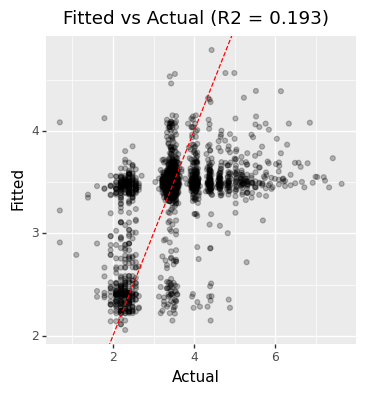

<ggplot: (739232476)>

In [92]:
from regression_diagnostics import RegressionDiagnostics

# Instantiate the class
diagnostics = RegressionDiagnostics(xgb_r)
diagnostics.fit(X_test, Y_test)
diagnostics.fitted_actual()

In [84]:
X_train

,PatientAge,OperationTypeCode,Gender,Hypertension,HeartFailure,Diabetes,MyocardialInfarction,CerebralInfarction,TobaccoUse,AlcoholUse,CCI
9242,0.360066,1,0,0,0,0,0,0,1,1,1
1259,1.086281,1,1,1,0,0,0,0,1,1,2
8240,1.416379,1,1,0,0,0,0,0,0,1,3
7600,-1.026344,1,0,0,0,0,0,0,0,1,0
6524,-0.696246,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
42,0.690164,0,0,1,0,0,0,0,0,1,2
8134,-0.828285,1,0,0,0,0,0,0,0,0,0
5278,-0.432168,1,0,0,0,0,0,0,1,1,0
1111,1.086281,1,0,0,0,0,0,0,1,1,2


In [42]:
def model_prediction (model, age, operation_type, gender, hypertension, heart_failure, diabetes, MI, stroke, tobacco, alcohol, CCI):
    
    #Store the input parameters
    userinput_age = age
    userinput_operation_type = operation_type
    userinput_gender = gender
    userinput_hypertension = hypertension
    userinput_heart_failure = heart_failure
    userinput_diabetes = diabetes
    userinput_MI = MI
    userinput_stroke = stroke
    userinput_alcohol = alcohol
    userinput_tobacco = tobacco
    userinput_CCI = CCI
    
    #Normalize the "Age" input parameter
    #userinput_age = np.log(np.array(userinput_age).reshape(-1,1))
    userinput_age = np.log(userinput_age)
    
    #Creat the final input array
    test = [userinput_age, userinput_operation_type, userinput_gender, userinput_hypertension, userinput_heart_failure, userinput_diabetes, userinput_MI, userinput_stroke, userinput_alcohol, userinput_tobacco, userinput_CCI]
    finalArray = np.asarray(test, dtype = np.float64, 
                        order ='C')

    henry = np.transpose(finalArray)
    test= pd.DataFrame(data = henry, index=['PatientAge', 'OperationTypeCode', 'Gender', 'Hypertension', 'HeartFailure', 'Diabetes', 'MyocardialInfarction', 'CerebralInfarction', 'TobaccoUse', 'AlcoholUse', 'CCI']) 
    test = test.T
    
    #Predict the output
    
    prediction = model.predict(test)
    
    return prediction, test

final_prediction, test = model_prediction(xgb_r,60, 1, 1, 1, 0, 0, 0,0,0,1,2)

In [43]:
print(np.exp(final_prediction))

[50.64007]


In [44]:
xgb_r.feature_importances_

array([0.02543653, 0.8052515 , 0.03453079, 0.01318856, 0.01510846,
       0.01372749, 0.01129238, 0.00857392, 0.0146102 , 0.01252978,
       0.04575035], dtype=float32)

(0.0, 0.1)

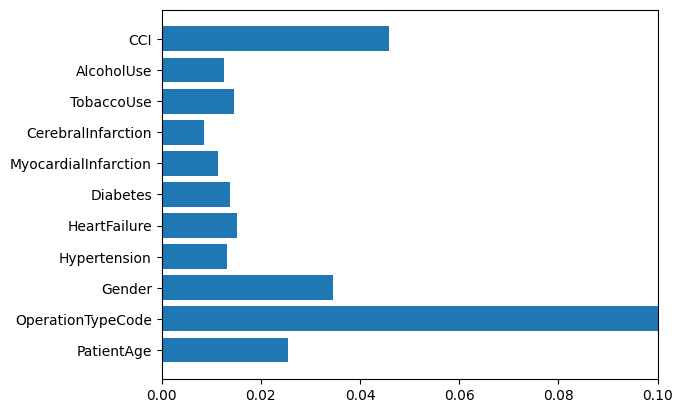

In [48]:
plt.barh(X_train.columns, xgb_r.feature_importances_)
plt.xlim(0,0.1)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


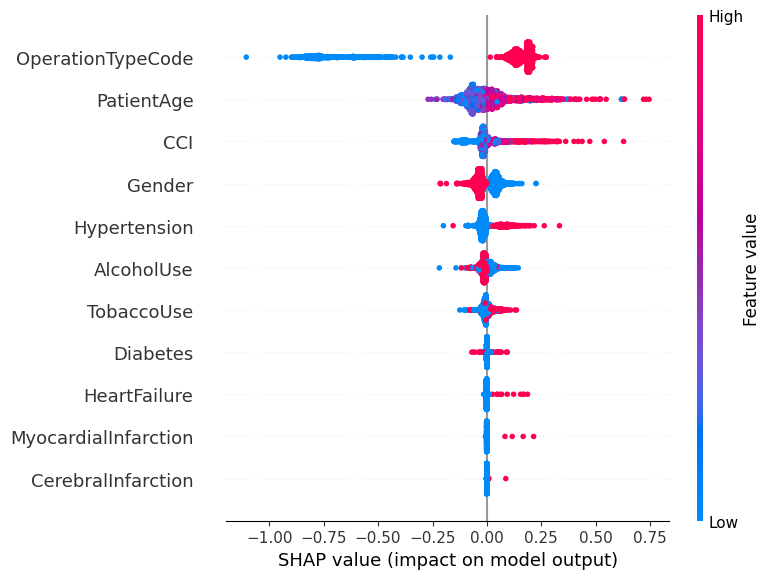

In [49]:
import shap

explainer = shap.TreeExplainer(xgb_r)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

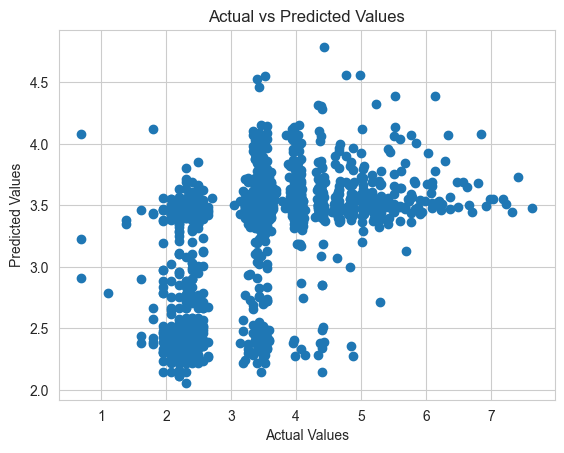

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(Y_test,pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()



In [59]:
def sigmoid(x0, x1, x2, x3, x4, x5, x6, x7, x8, x9,Beta_0, Beta_1, Beta_2, Beta_3, Beta_4, Beta_5, Beta_6, Beta_7, Beta_8, Beta_9):
     y = 1 / (1 + np.exp(-(Beta_0*x0 + Beta_1*x1 + Beta_2*x2 + Beta_3*x3 + Beta_4*x4 + Beta_5*x5 + Beta_6*x6 + Beta_7*x7 + Beta_8*x8 + Beta_9*x9)))
     return y

beta_0 = 363.207
beta_1 = -36.824
beta_2 = 10.532
beta_3 = -14.858
beta_4 = -65.841
beta_5 = -198.320
beta_6 = -5.444
beta_7 = 12.559
beta_8 = 15.309
beta_9 = -0.572

Y_pred = sigmoid(1,0,1,1,0,0,0,1,2,89, beta_0, beta_1 , beta_2, beta_3, beta_4, beta_5, beta_6, beta_7, beta_8, beta_9)
print ("Predicted value: ", Y_pred)

Predicted value:  1.0


In [78]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

df = pd.read_excel(r'//Users//sayanbiswas//Downloads//Spine CVS.xlsx')

X = df.drop(['LOShour','ID','AdmissionDate','Year','Month','AdmissionType','AdmissionSourceDescription','DischargeDestinationDescription', 'LogLOS', 'BINLOS', 'OperationTypeDescription', 'ProcedureDescription', 'Total_CVS', 'AgeWeight'], axis = 1)
Y = df['LOShour']

#Convert Y to log
Y = np.log(Y)

final_poly_converter = PolynomialFeatures(degree=6,include_bias=False)
final_model_poly = final_poly_converter.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42, stratify=df['OperationTypeCode'])

final_model = LinearRegression()

final_model.fit(X_train,Y_train)

# Predict the model
pred = final_model.predict(X_test)

# RMSE Computation
rmse = np.sqrt(MSE(Y_test, pred))
print("RMSE : % f" %(rmse))

mae = MAE(Y_test, pred)
print("MAE : % f" %(mae))

mse = MSE(Y_test, pred)
print("MSE : % f" %(mse))

msle = MSLE(Y_test, pred)
print("RMSLE : % f" %(math.sqrt(msle)))

RMSE :  0.789285
MAE :  0.572178
MSE :  0.622971
RMSLE :  0.171401


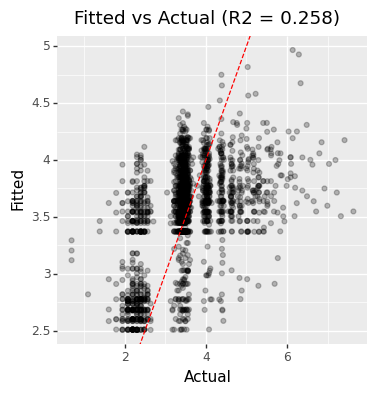

<ggplot: (740404041)>

In [79]:
from regression_diagnostics import RegressionDiagnostics

# Instantiate the class
diagnostics = RegressionDiagnostics(final_model)
diagnostics.fit(X_test, Y_test)
diagnostics.fitted_actual()